In [1]:
%matplotlib inline

%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cftime
import dask
import xarrayutils
import cartopy.crs as ccrs
from xmip.preprocessing import combined_preprocessing
from xmip.preprocessing import replace_x_y_nominal_lat_lon
from xmip.drift_removal import replace_time
from xmip.postprocessing import concat_experiments
import xmip.drift_removal as xm_dr
import xmip as xm
import xesmf as xe
import datetime
from dateutil.relativedelta import relativedelta
import utils


from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


import string
alphabet = list(string.ascii_lowercase)
          

## Data

Data for this is from https://gmd.copernicus.org/articles/11/1133/2018/ CDRMIP data, where pi-CO2pulse is the 100GtC pulse and piControl is the control

In [2]:
G_ds = xr.open_dataset('Outputs/G_internal_var_ds.nc4')['__xarray_dataarray_variable__']
G_cdr_ds = xr.open_dataset('Outputs/G_cdr_internal_var_ds.nc4')['__xarray_dataarray_variable__']

In [3]:
G_ds = xr.concat([G_ds, -G_cdr_ds], pd.Index(['pulse','cdr'], name = 'pulse_type'))
G_ds.name = 'G[tas]'

In [4]:
A = utils.A

In [5]:
mean_G = G_ds.weighted(A).mean(dim = ['lat','lon']).mean(dim = 'pulse_type')

In [6]:
model_color = utils.model_color


In [7]:
internal_var = mean_G.var(dim = ['pulse_year']).mean(dim = 'model')

/home/emfreese/anaconda3/envs/gchp/lib/python3.9/site-packages/xarray/core/nputils.py:155: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [8]:
model_var = mean_G.var(dim = ['model']).mean(dim = 'pulse_year')

In [9]:
total_var = internal_var + model_var

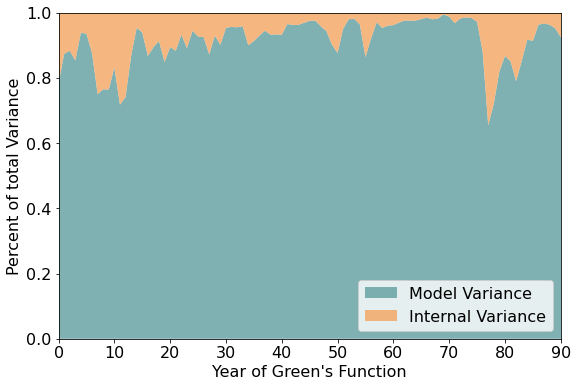

In [13]:
fig, ax = plt.subplots(figsize = [9,6])
plt.stackplot(model_var['year'], 
              model_var/total_var,
              internal_var/total_var,
              labels = ['Model Variance', 'Internal Variance'],
              colors = ['cadetblue','sandybrown'],
             alpha = 0.8);
plt.legend(loc = 'lower right',fontsize = 16)
plt.xlim(0,90)
plt.ylim(0,1)
plt.ylabel('Percent of total Variance', fontsize = 16)
plt.xlabel('Year of Green\'s Function', fontsize = 16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
plt.savefig('figures/paper/supp_variance_model_intern_GF.png', bbox_inches = 'tight', dpi = 250)